In [1]:
# Importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Importing the dataset 
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# descibe the dimentions of dataset 
df.shape

(200, 5)

In [5]:
# Checking for the null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Changing gender male with 1 and female with 0
df  = df.replace({"Female":0,"Male":1})
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
# creating a new datafrme which only have annual income and spending score
new_df=df[['Annual Income (k$)','Spending Score (1-100)']]
new_df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


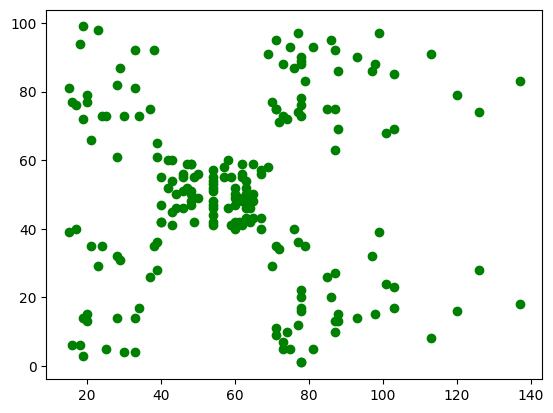

In [9]:
#Scatte plot of new dataframe
plt.scatter(new_df['Annual Income (k$)'],new_df['Spending Score (1-100)'],color='green')

In [10]:
# selecting ranfom values and creating a k means model
kmeans = KMeans(n_clusters=3,init = 'k-means++',random_state=47).fit(new_df)

In [12]:
kmeans.labels_
#kmeans.labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [13]:
new_df['label']= kmeans.labels_
new_df

/tmp/ipykernel_4248/1062439762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['label']= kmeans.labels_


,Annual Income (k$),Spending Score (1-100),label
0,15,39,2
1,15,81,2
2,16,6,2
3,16,77,2
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


In [14]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [87.        , 18.63157895],
       [44.15447154, 49.82926829]])

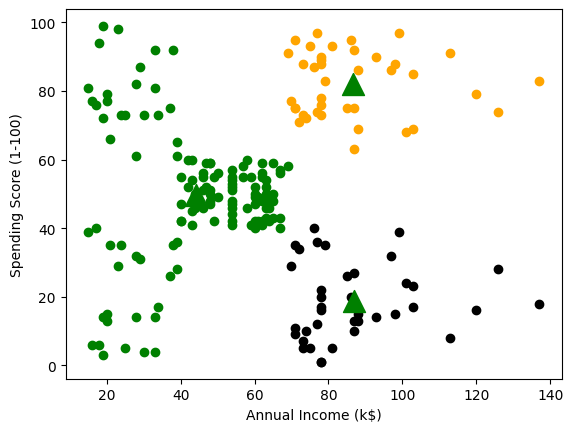

In [15]:
x = new_df['Annual Income (k$)']
y = new_df['Spending Score (1-100)']
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.scatter(x[new_df['label']==0],y[new_df['label']==0],c="orange",label='cluster 0')
plt.scatter(x[new_df['label']==1],y[new_df['label']==1],c="black",label='cluster 1')
plt.scatter(x[new_df['label']==2],y[new_df['label']==2],c="green",label='cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s = 250, c = 'green',marker='^',label = 'Centroids')